# Generate Graphs for % Change MD

/Users/james/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/james/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/james/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


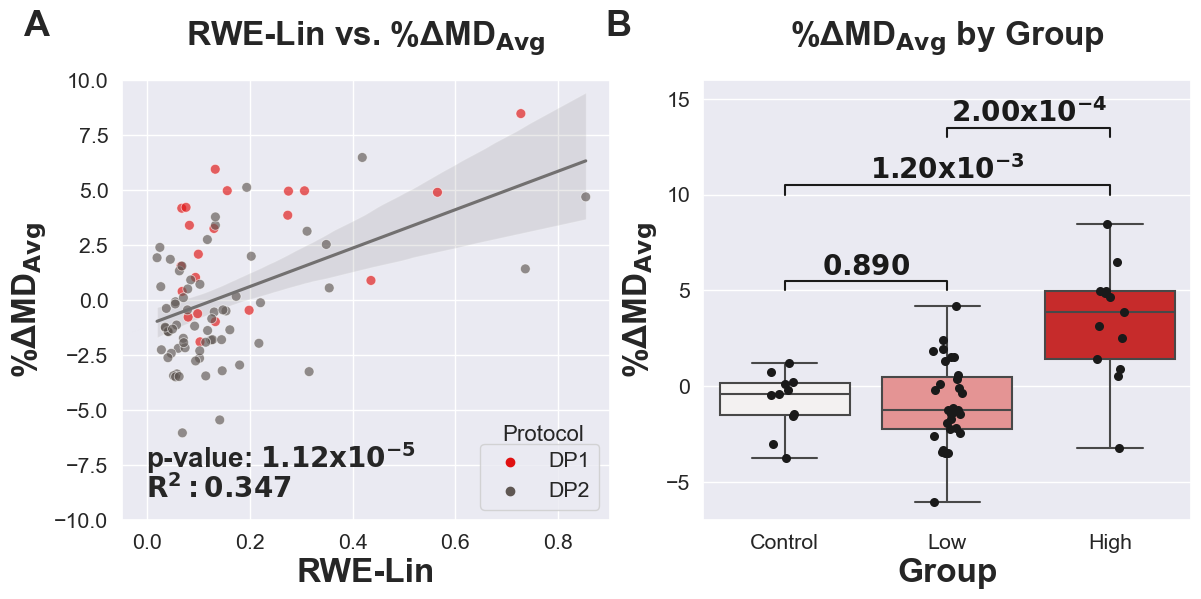

In [11]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import string

# Import your data
df = pd.read_csv(filepath_or_buffer="/Users/james/Desktop/hs_final.csv") #file path
#df['Protocol'] = df['Protocol'].apply(str)

# Subindex dataframes
# creates a dataframe with only control subjects
control_df = df[df['Biomech_Group'] == 'Control']
# creates a dataframe with only football players
football_df = df[df['Sport'] == 'Football']
# creates a dataframe with only concussion players
#conc = df[df['Biomech_Group'] == 'Concussion']
# creates a dataframe WITHOUT the subjects in the center of the head impact distribution
no_midd_df = df[df['Biomech_Group'] != 'Mid']

# Change figure size by changing the values in "figsize=()" The first value = x-axis, second = y-axis. 
# Values are in inches
f = plt.figure(figsize=(12, 6))
# Modify the color pallette (just look up different ones online)
sns.set(style="darkgrid", font_scale = 1.4)

# Custom color pallettes can be created from hex codes. Look them up here: https://htmlcolorcodes.com/
flatui = ["#E01111", "#5F5753", "#F18787"]
flatui_r = ["#727070", "#FAB1B1", "#E04E4E"]

# Set your color pallette
sns.set_palette(flatui_r)

# Make your first plot (This will create a 2 row, 1 column architecture to display your subplots)
plt.subplot(1, 2, 1) #1st value is # of rows, 2nd is # of columns, 1st image

# Define your regression, by pointing to x and y variables of interest
# Different markers can be found at: #https://matplotlib.org/3.1.0/api/markers_api.html
a = sns.regplot(x="Lin", y="MD_Avg", data=football_df, marker="o", scatter_kws={'s':0}) #here we make the markers invisibile so we write over them in the next call to sns
sns.set_palette(flatui)
# Create your plotted points over top of the previous regression
# Hue allows you to set colors for continuous or discrete variables
# Size allows you to set the marker size based on the variable of interest
# Sizes allows you to define a size range
# Alpha sets the opacity of the points
# data defines the dataframe used to make the plot
a = sns.scatterplot(x="Lin", y="MD_Avg", hue='DTI Protocol', s=50, alpha=0.65, data=football_df)

# Create plot legend and define location. Legend will describe how to interpret other variables of BMI and Protocol
a.legend(loc="lower right")

# Set your title, x-axis, y-axis
# Fontsize changes your font size, weight changes style (italic, bold)
a.axes.set_title(r'RWE-Lin vs. %ΔMD$_{\mathbf{Avg}}$', fontsize=24, weight='bold', y=1.06) #adjust text and font size of title
a.set_xlabel('RWE-Lin',fontsize=24, weight='bold') #adjust text and font size of xlabel
a.set_ylabel(r"%ΔMD$_{\mathbf{Avg}}$",fontsize=24, weight='bold') #adjust text and font size of ylabel

# set a figure subleger (Ex: Fig1A, 1B, etc. )
# first value is as a percentage of x-axis, second value is as a percentage of y-axis
a.text(-0.2, 1.1, 'A', transform=a.transAxes, size=26, weight='bold')

# Add p-values and correlation coefficients to your plot
a.text(0.05, 0.12, r'p-value: $\mathbf{1.12x10^{-5}}$', transform=a.transAxes, size=20, weight='bold')
a.text(0.05, 0.05, r'$\mathbf{R^{2}: 0.347}$', transform=a.transAxes, size=20, weight='bold')
a.text(0.78, 0.18, 'Protocol', transform=a.transAxes, size=16)

# Set x and y axis limits
a.set_xlim([-0.05, 0.9])  
a.set_ylim([-10, 10])

sns.set_palette(flatui)
plt.subplot(1, 2, 2) #2 rows, 1 column, 2nd image
# Create swarm plot
# "order" controls which group is listed in which order. Otherwise groups are listed in alphanumerical order
b = sns.boxplot(y=no_midd_df['MD_Avg'], x=no_midd_df['Biomech_Group'], order=[ "Control", "Low", "High"], palette=["#F4F0F0", "#F18787", "#E01111"])
#b = sns.violinplot(y= no_midd_df['MD_Avg'], x=no_midd_df['Biomech_Group'], order=["Control", "Low", "High"])
sns.stripplot(x=no_midd_df['Biomech_Group'], y=no_midd_df['MD_Avg'], order=[ "Control", "Low", "High"], dodge=False, legend=False, color='k', edgecolor='k', linewidth=1.5, size=5)
b.set(ylim=(-7, 16))
b.axes.set_title("%ΔMD$_{\mathbf{Avg}}$ by Group", fontsize=24, weight='bold', y=1.06)
b.set_xlabel("Group",fontsize=24, weight='bold')
b.text(-0.20, 1.1, 'B', transform=b.transAxes, size=26, weight='bold')
b.set_ylabel(r"%ΔMD$_{\mathbf{Avg}}$",fontsize=24, weight='bold') 

# Building the whiskers above each distribution to display the p-values
# "x1" and "x2" define the indices of the groups for comparison (Control = 0, Low = 1, High = 2) 
# The order is based on the order specified above or is alphanumerical 
x1, x2 = 0, 1
# y = y-axis value where the horizontal line will be
# h = the height of the vertical whiskers at the end of each line
# col = color of the line
y, h, col = 5, 0.5, 'k'
# plot the whisker line
# lw defines the line width
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# define and write text to be displayed above each line
plt.text((x1+x2)*0.5, y+0.5, r'$\mathbf{0.890}$', ha='center', va='bottom', color=col, fontsize=20, weight='bold')

x1, x2 = 0, 2
y, h, col = 10, 0.5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+0.5, r'$\mathbf{1.20x10^{-3}}$', ha='center', va='bottom', color=col, fontsize=20, weight='bold')

x1, x2 = 1, 2
y, h, col = 13, 0.5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+0.5, r'$\mathbf{2.00x10^{-4}}$', ha='center', va='bottom', color=col, fontsize=20, weight='bold')

#padding controls the distance between subplots so that labels don't overlap
f.tight_layout(pad=0.4)

# Write the image out in 600 dpi (common standard for journals, but can be changed by changing the value after "dpi")
plt.savefig('/Users/james/Desktop/NeuroImage_MD.tif', dpi=600, bbox_inches='tight')

# Generate Graphs for % Change PSD

/Users/james/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/james/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/james/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


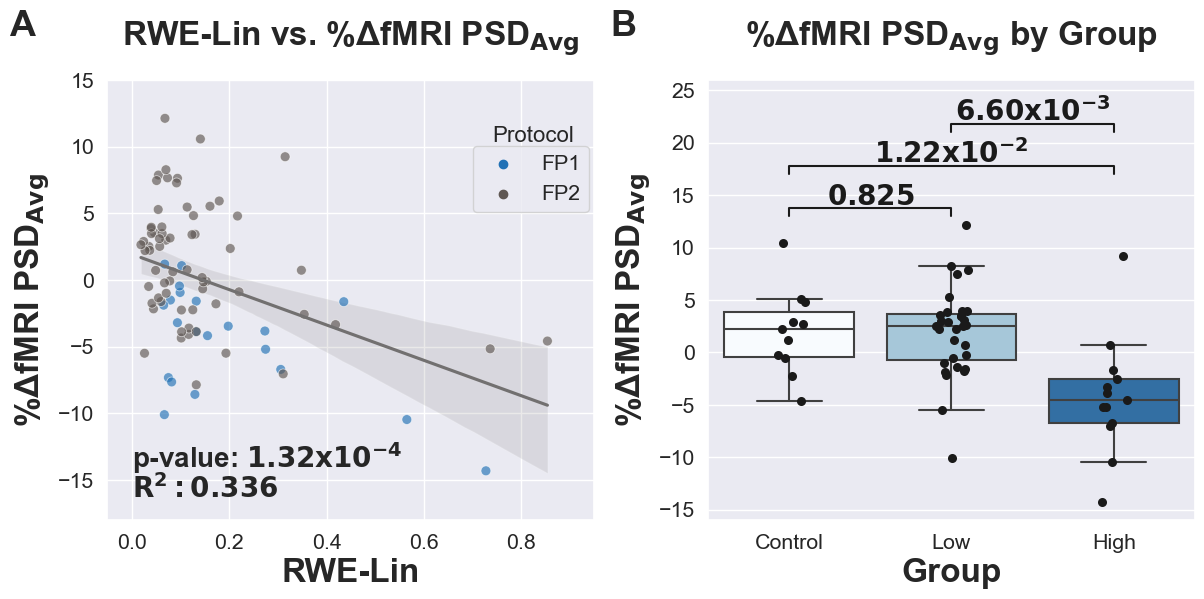

In [12]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import string

# Import your data
df = pd.read_csv(filepath_or_buffer="/Users/james/Desktop/hs_final.csv") #file path
#df['Protocol'] = df['Protocol'].apply(str)

# Subindex dataframes
# creates a dataframe with only control subjects
control_df = df[df['Biomech_Group'] == 'Control']
# creates a dataframe with only football players
football_df = df[df['Sport'] == 'Football']
# creates a dataframe with only concussion players
#conc = df[df['Biomech_Group'] == 'Concussion']
# creates a dataframe WITHOUT the subjects in the center of the head impact distribution
no_midd_df = df[df['Biomech_Group'] != 'Mid']

# Change figure size by changing the values in "figsize=()" The first value = x-axis, second = y-axis. 
# Values are in inches
f = plt.figure(figsize=(12, 6))
# Modify the color pallette (just look up different ones online)
sns.set(style="darkgrid", font_scale = 1.4)

# Custom color pallettes can be created from hex codes. Look them up here: https://htmlcolorcodes.com/
flatui = ["#2171b5", "#5F5753", "#F18787"]
flatui_r = ["#727070", "#FAB1B1", "#E04E4E"]

# Set your color pallette
sns.set_palette(flatui_r)

# Make your first plot (This will create a 2 row, 1 column architecture to display your subplots)
plt.subplot(1, 2, 1) #1st value is # of rows, 2nd is # of columns, 1st image

# Define your regression, by pointing to x and y variables of interest
# Different markers can be found at: #https://matplotlib.org/3.1.0/api/markers_api.html
a = sns.regplot(x="Lin", y="PSD_Avg", data=football_df, marker="o", scatter_kws={'s':0}) #here we make the markers invisibile so we write over them in the next call to sns
sns.set_palette(flatui)
# Create your plotted points over top of the previous regression
# Hue allows you to set colors for continuous or discrete variables
# Size allows you to set the marker size based on the variable of interest
# Sizes allows you to define a size range
# Alpha sets the opacity of the points
# data defines the dataframe used to make the plot
a = sns.scatterplot(x="Lin", y="PSD_Avg", hue='fMRI Protocol', s=50, alpha=0.65, data=football_df)

# Create plot legend and define location. Legend will describe how to interpret other variables of BMI and Protocol
a.legend(loc=(0.75, 0.70))

# Set your title, x-axis, y-axis
# Fontsize changes your font size, weight changes style (italic, bold)
a.axes.set_title(r'RWE-Lin vs. %ΔfMRI PSD$_{\mathbf{Avg}}$', fontsize=24, weight='bold', y=1.06) #adjust text and font size of title
a.set_xlabel('RWE-Lin',fontsize=24, weight='bold') #adjust text and font size of xlabel
a.set_ylabel(r"%ΔfMRI PSD$_{\mathbf{Avg}}$",fontsize=24, weight='bold') #adjust text and font size of ylabel

# set a figure subleger (Ex: Fig1A, 1B, etc. )
# first value is as a percentage of x-axis, second value is as a percentage of y-axis
a.text(-0.2, 1.1, 'A', transform=a.transAxes, size=26, weight='bold')

# Add p-values and correlation coefficients to your plot
a.text(0.05, 0.12, r'p-value: $\mathbf{1.32x10^{-4}}$', transform=a.transAxes, size=20, weight='bold')
a.text(0.05, 0.05, r'$\mathbf{R^{2}: 0.336}$', transform=a.transAxes, size=20, weight='bold')
a.text(0.79, 0.86, 'Protocol', transform=a.transAxes, size=16)

# Set x and y axis limits
a.set_xlim([-0.05, 0.95])  
a.set_ylim([-18, 15])

sns.set_palette(flatui)
plt.subplot(1, 2, 2) #2 rows, 1 column, 2nd image
# Create swarm plot
# "order" controls which group is listed in which order. Otherwise groups are listed in alphanumerical order
b = sns.boxplot(y=no_midd_df['PSD_Avg'], x=no_midd_df['Biomech_Group'], order=[ "Control", "Low", "High"], palette=['#f7fbff', "#9ecae1", "#2171b5"], showfliers=False)
#b = sns.violinplot(no_midd_df['PSD_Avg'], x=no_midd_df['Biomech_Group'], order=[ "Control", "Low", "High"], palette=["#F4F0F0", "#F18787", "#E01111"])
sns.stripplot(x=no_midd_df['Biomech_Group'], y=no_midd_df['PSD_Avg'], order=[ "Control", "Low", "High"], dodge=False, legend=False, color='k', edgecolor='k', linewidth=1.5, size=5)
b.set(ylim=(-16, 26))
b.axes.set_title("%ΔfMRI PSD$_{\mathbf{Avg}}$ by Group", fontsize=24, weight='bold', y=1.06)
b.set_xlabel("Group",fontsize=24, weight='bold')
b.text(-0.20, 1.1, 'B', transform=b.transAxes, size=26, weight='bold')
b.set_ylabel(r"%ΔfMRI PSD$_{\mathbf{Avg}}$",fontsize=24, weight='bold') 

# Building the whiskers above each distribution to display the p-values
# "x1" and "x2" define the indices of the groups for comparison (Control = 0, Low = 1, High = 2) 
# The order is based on the order specified above or is alphanumerical 
x1, x2 = 0, 1
# y = y-axis value where the horizontal line will be
# h = the height of the vertical whiskers at the end of each line
# col = color of the line
y, h, col = 13, 0.75, 'k'
# plot the whisker line
# lw defines the line width
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# define and write text to be displayed above each line
plt.text((x1+x2)*0.5, y+0.5, r'$\mathbf{0.825}$', ha='center', va='bottom', color=col, fontsize=20, weight='bold')

x1, x2 = 0, 2
y, h, col = 17, 0.75, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+0.5, r'$\mathbf{1.22x10^{-2}}$', ha='center', va='bottom', color=col, fontsize=20, weight='bold')

x1, x2 = 1, 2
y, h, col = 21, 0.75, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+0.5, r'$\mathbf{6.60x10^{-3}}$', ha='center', va='bottom', color=col, fontsize=20, weight='bold')

#padding controls the distance between subplots so that labels don't overlap
f.tight_layout(pad=0.4)

# Write the image out in 600 dpi (common standard for journals, but can be changed by changing the value after "dpi")
plt.savefig('/Users/james/Desktop/NeuroImage_PSD.tif', dpi=600, bbox_inches='tight')

# Generate Graphs for Correlation between MD and PSD

/var/folders/2r/xxyv05y122l6z0zxzttrpzhw0000gn/T/ipykernel_43584/2365079136.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a = sns.scatterplot(x="MD_Avg", y="PSD_Avg", s=50, alpha=0.65, data=control_df, palette='Viridis')


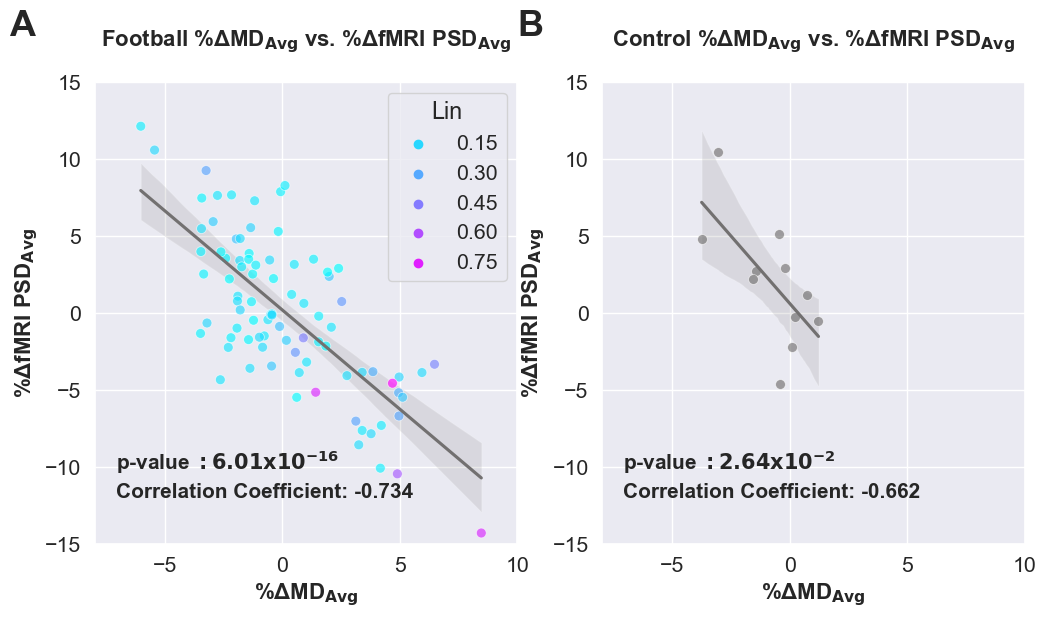

In [13]:
# Custom color pallettes can be created from hex codes. Look them up here: https://htmlcolorcodes.com/
df = pd.read_csv(filepath_or_buffer="/Users/james/Desktop/hs_final.csv") #file path
# Subindex dataframes
# creates a dataframe with only control subjects
control_df = df[df['Biomech_Group'] == 'Control']
# creates a dataframe with only football players
football_df = df[df['Sport'] == 'Football']
# creates a dataframe with only concussion players
#conc = df[df['Biomech_Group'] == 'Concussion']
# creates a dataframe WITHOUT the subjects in the center of the head impact distribution
no_midd_df = df[df['Biomech_Group'] != 'Mid']
football_df = df[df['Biomech_Group'] != 'Control']
flatui = ["#727070", "#23A3CF"]
sns.set_palette(flatui)
control_df = df[df['Biomech_Group'] == 'Control']
high_df = df[df['Biomech_Group'] == 'High']
low_df = df[df['Biomech_Group'] == 'Low']
f = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) #1st value is # of rows, 2nd is # of columns, 1st image
a = sns.regplot(x="MD_Avg", y="PSD_Avg", data=football_df, marker="o", scatter_kws={'s':0})
a = sns.scatterplot(x="MD_Avg", y="PSD_Avg", s=50, alpha=0.65, data=football_df, hue='Lin', palette='cool')
a.text(-0.2, 1.1, 'A', transform=a.transAxes, size=26, weight='bold')
a.text(0.05, 0.16, r'p-value $\mathbf{:6.01x10^{-16}}$', transform=a.transAxes, size=15, weight='bold')
a.text(0.05, 0.10, 'Correlation Coefficient: -0.734', transform=a.transAxes, size=15, weight='bold')
a.axes.set_title(r"Football %ΔMD$_{\mathbf{Avg}}$ vs. %ΔfMRI PSD$_{\mathbf{Avg}}$", fontsize=16, weight='bold', y=1.06) #adjust text and font size of title
a.set_xlabel(r"%ΔMD$_{\mathbf{Avg}}$",fontsize=16, weight='bold') #adjust text and font size of xlabel
a.set_ylabel(r"%ΔfMRI PSD$_{\mathbf{Avg}}$",fontsize=16, weight='bold') #adjust text and font size of ylabel
a.set_xlim([-8, 10])  
a.set_ylim([-15, 15])

plt.subplot(1, 2, 2) #1st value is # of rows, 2nd is # of columns, 1st image
a = sns.regplot(x="MD_Avg", y="PSD_Avg", data=control_df, marker="o", scatter_kws={'s':0})
a = sns.scatterplot(x="MD_Avg", y="PSD_Avg", s=50, alpha=0.65, data=control_df, palette='Viridis')
a.text(-0.2, 1.1, 'B', transform=a.transAxes, size=26, weight='bold')
a.text(0.05, 0.16, r'p-value $\mathbf{:2.64x10^{-2}}$', transform=a.transAxes, size=15, weight='bold')
a.text(0.05, 0.10, 'Correlation Coefficient: -0.662', transform=a.transAxes, size=15, weight='bold')
a.axes.set_title(r"Control %ΔMD$_{\mathbf{Avg}}$ vs. %ΔfMRI PSD$_{\mathbf{Avg}}$", fontsize=16, weight='bold', y=1.06) #adjust text and font size of title
a.set_xlabel(r"%ΔMD$_{\mathbf{Avg}}$",fontsize=16, weight='bold') #adjust text and font size of xlabel
a.set_ylabel(r"%ΔfMRI PSD$_{\mathbf{Avg}}$",fontsize=16, weight='bold') #adjust text and font size of ylabel
a.set_xlim([-8, 10])  
a.set_ylim([-15, 15])
plt.savefig('/Users/james/Desktop/NeuroImage_MDPSD.tif', dpi=600, bbox_inches='tight')

# Perform Permutation testing to determine if RWE-Lin Outperforms Number of Head Impacts in explaining variation of %Change MD

In [14]:
from sklearn.linear_model import LinearRegression
from numpy import random
import pandas as pd
import numpy as np
measure = 'MD_Avg'
random.seed(0)
pd.options.mode.chained_assignment = None
df = pd.read_csv(filepath_or_buffer="/Users/james/Desktop/hs_final.csv") #file path
# creates a dataframe with only football players
football_df = df[df['Sport'] == 'Football']
inst = 0
model = LinearRegression()
X, y = football_df[['Lin', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
model.fit(X, y)
orig_strainr2 = model.score(X, y)
X, y = football_df[['Num_impacts', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
model.fit(X, y)
orig_numr2 = model.score(X, y)
origr2diff = orig_strainr2 - orig_numr2

for i in range(1000):
    orig = np.array(football_df[measure].values)
    random.shuffle(orig)
    football_df[measure] = orig
    model = LinearRegression()
    X, y = football_df[['Lin', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
    model.fit(X, y)
    strainr2 = model.score(X, y)
    X, y = football_df[['Num_impacts', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
    model.fit(X, y)
    numr2 = model.score(X, y)
    r2diff = strainr2-numr2
    if r2diff > origr2diff: 
        inst += 1

print(inst / 1000)

0.0


# Perform Permutation testing to determine if RWE-Lin Outperforms Number of Head Impacts in explaining variation of %Change PSD

In [15]:
from sklearn.linear_model import LinearRegression
from numpy import random
import pandas as pd
import numpy as np
measure = 'PSD_Avg'
random.seed(0)
pd.options.mode.chained_assignment = None
df = pd.read_csv(filepath_or_buffer="/Users/james/Desktop/hs_final.csv") #file path
# creates a dataframe with only football players
football_df = df[df['Sport'] == 'Football']
inst = 0
model = LinearRegression()
X, y = football_df[['Lin', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
model.fit(X, y)
orig_strainr2 = model.score(X, y)
X, y = football_df[['Num_impacts', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
model.fit(X, y)
orig_numr2 = model.score(X, y)
origr2diff = orig_strainr2 - orig_numr2

for i in range(1000):
    orig = np.array(football_df[measure].values)
    random.shuffle(orig)
    football_df[measure] = orig
    model = LinearRegression()
    X, y = football_df[['Lin', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
    model.fit(X, y)
    strainr2 = model.score(X, y)
    X, y = football_df[['Num_impacts', 'Age', 'BMI_Percentile', 'Pos_Bin', 'Level_Bin', 'TBS_Days', 'Scanner_Bin', 'Concussion_bin']], football_df[[measure]]
    model.fit(X, y)
    numr2 = model.score(X, y)
    r2diff = strainr2-numr2
    if r2diff > origr2diff: 
        inst += 1

print(inst / 1000)

0.0
